## Question 1

In [138]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [137]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [236]:
# Defining the google drive file paths for the training and testing datasets
x_train_path = '/content/drive/My Drive/Colab Notebooks/Files_1/x_train.npy'
y_train_path = '/content/drive/My Drive/Colab Notebooks/Files_1/y_train.npy'
x_test_path = '/content/drive/My Drive/Colab Notebooks/Files_1/x_test.npy'
y_test_path = '/content/drive/My Drive/Colab Notebooks/Files_1/y_test.npy'

# Loading the training and testing datasets
x_train = np.load(x_train_path)
y_train = np.load(y_train_path)
x_test = np.load(x_test_path)
y_test = np.load(y_test_path)

In [ ]:
# Sckikit learn for verification purposes
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_train)

In [ ]:
poly_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_2.fit_transform(x_train)
X_test_poly_2 = poly_2.fit_transform(x_test)

LR_poly = LinearRegression()
LR_poly.fit(X_poly_2,y_train)
y_pred_poly = LR_poly.predict(X_poly_2)

In [129]:
poly_5 = PolynomialFeatures(degree = 5)
X_poly_5 = poly_5.fit_transform(x_train)
X_test_poly_5 = poly_5.fit_transform(x_test)

LR_poly = LinearRegression()
LR_poly.fit(X_poly_5,y_train)
y_pred_poly = LR_poly.predict(X_poly_5)

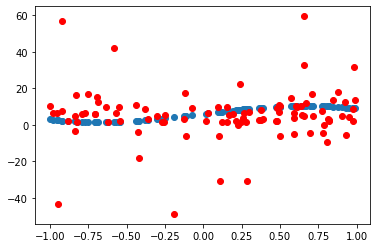

In [131]:
# Plotting degree 5
plt.scatter(x_test,y_test)
plt.scatter(x_test, y_pred_poly, color='r')
plt.show()

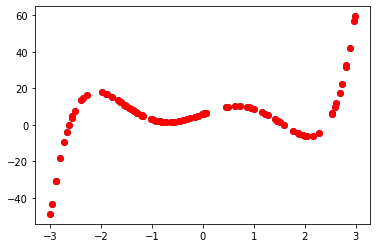

In [133]:
# Degree 5
plt.scatter(x_train,y_train)
plt.scatter(x_train, y_pred_poly, color='r')
plt.show()

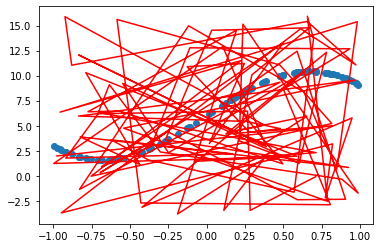

In [ ]:
# Plotting degree 2
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred_poly, color='r')
plt.show()

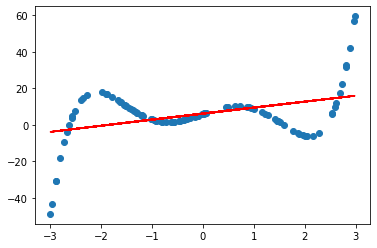

In [ ]:
# Predicting y for entire training set with polynomial basis function
plt.scatter(x_train,y_train)
plt.plot(x_train, y_pred_poly, color='r')
plt.show()

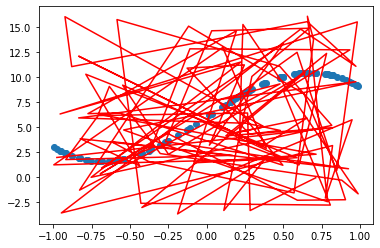

In [ ]:
# Plotting original linear regression
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, color='r')
plt.show()

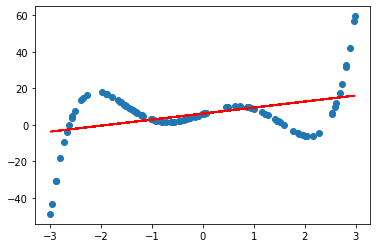

In [ ]:
# Predicting y for entire training dataset
plt.scatter(x_train,y_train)
plt.plot(x_train, y_pred, color='r')
plt.show()

In [114]:
# Implementing Linear Regression without scikit learn
# Normal Equations
rows,cols = x_train.shape
X = np.append(x_train, np.ones((rows,1)), axis=1) 
Y = y_train.reshape(rows,1)
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)

In [126]:
# Making predictions
y_pred = np.dot(X, theta) 

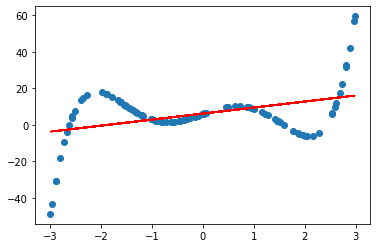

In [128]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,color ='red')
plt.show()

1.2.1 The relationship is not linear. 
1.2.2 Yes, feature engineering will be required to handle the non-linearity of the relationship between x-train and y_train.
1.2.3 Basis function can be used to engineer these features. Polynomial basis functions look potentially viable.
1.2.3.1 By changing the training dataset by adding the polynomial function, you engineer these features. The x^5 function is the one which is the best. 

## Question 2

In [229]:
data_path = '/content/drive/My Drive/Colab Notebooks/Files_1/Assignment1_Q2_Data.csv'
data = pd.read_csv(data_path)
x_train = data.iloc[:,1:11].to_numpy()
y_train = data.iloc[:,12].to_numpy()

In [230]:
# Normal Equations
rows,cols = x_train.shape
X = np.append(x_train, np.ones((rows,1)), axis=1) 
Y = y_train.reshape(rows,1)
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)

In [231]:
# Finding average least squares error
sum = theta.sum()
n = len(theta)

avg_error = sum / n
print("Average least sqaure error = ",avg_error)

Average least sqaure error =  2.3452252540118654


In [232]:
theta

array([[ 1.08523347],
       [ 9.31201607],
       [ 0.33005882],
       [12.77930675],
       [ 2.31870791],
       [ 0.02121711],
       [-2.5397795 ],
       [-0.0473698 ],
       [ 1.02525278],
       [ 0.28716745],
       [ 1.22566676]])

In [233]:
# Question 2.2
print("Best feature: Garage feature error", theta[4])
print("Least important feature: Living area error",theta[3])
x_train = data.iloc[:,5:6].to_numpy()

# Normal Equations
rows,cols = x_train.shape
X = np.append(x_train, np.ones((rows,1)), axis=1) 
Y = y_train.reshape(rows,1)
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)

Best feature: Garage feature error [2.31870791]
Least important feature: Living area error [12.77930675]


2.1 The theta array from the normal equations is basically the individual errors of each feature. So taking the sum and dividing the total features, gives the average least square error. The average least square error is 2.345

2.2 The number of garages has an individual error of 2.318 which is derived from the theta array (theta[4]). This factor is the closest to the final average value. This implies that this factor has the least error to the final average error value; making it the most important factor.



In [234]:
# Making predictions
y_pred = np.dot(X, theta) 

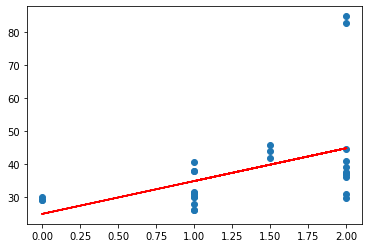

In [235]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred,color ='red')
plt.show()

This is the plot using the number of garages as the only feature. The plot is okay; certainly other factors that are close to the average error can be used like local price, land area, number of rooms etc.

•	Answer 3: The number of living rooms has the least effect on the final value as its error is the farthest away from the average value (theta[3] = 12.779). The high error of this feature shows that the effect of this feature is least prominent on predicting the price of the houses. 
•	Removing this feature, will increase the performance of the prediction of the house prices because it will decrease the average error of price prediction.



## Question 3

In [237]:
from prompt_toolkit.layout.dummy import D
# Calculate weight matrix
n = x_train.shape[0]

w = np.mat(np.eye(m)) # Initializing as identity matrix

for i in range(m):
  xi = x_train[i]
  den = (-2 * tau * tau)
  w[i,i] = np.exp(np.square(xi - point)) / den

return w


# Question 3.1: Yes, you need basis function to adequatly plot the relationship between x and y.
# Question 3.2: The only difference is the addition of the weight matrix in the inverse computation and the dot product for the finding the theta values. 